In [4]:
import pandas as pd
import numpy as np
import pybaseball
from pybaseball.lahman import *
from pybaseball import bwar_pitch
from pybaseball import pitching_stats_bref
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# removes warnings for readability
import warnings
warnings.simplefilter(action='ignore')

In [3]:
# gathers data
bwar = bwar_pitch()

stats2021 = pitching_stats_bref(2021)
stats2022 = pitching_stats_bref(2022)
stats2023 = pitching_stats_bref(2023)

In [ ]:
# creates a year column for each of the stats dataframes
stats2021['year_ID'] = 2021
stats2022['year_ID'] = 2022
stats2023['year_ID'] = 2023

# combines the stats dataframes into one and selects out only the mlbID, year_ID, and Age
pitching_stats = pd.concat([stats2021, stats2022, stats2023])
pitching_stats = pitching_stats.loc[:, ['mlbID', 'year_ID', 'Age']]
pitching_stats['mlb_ID'] = pitching_stats['mlbID'].astype(int)

In [ ]:
# combines bwar and pitching stats into one dataframe (joined on mlbID and year)
bwar = bwar.merge(pitching_stats)

In [95]:
# calculates how much each pitcher earned per point of ERA+
bwar['mil_per_ERA+'] = (bwar['salary'] / 1000000) / bwar['ERA_plus']

In [96]:
# filters to only include post-2020 starting pitchers with >=20 games and are 28-or-older
bwar_age = bwar.loc[(bwar['year_ID']>=2021) & (bwar['GS'] / bwar['G']>=0.6) & (bwar['G'] >= 20) & (bwar['Age'] >= 28), :].dropna(
    subset=['salary'])

Text(0, 0.5, 'Contract (millions)')

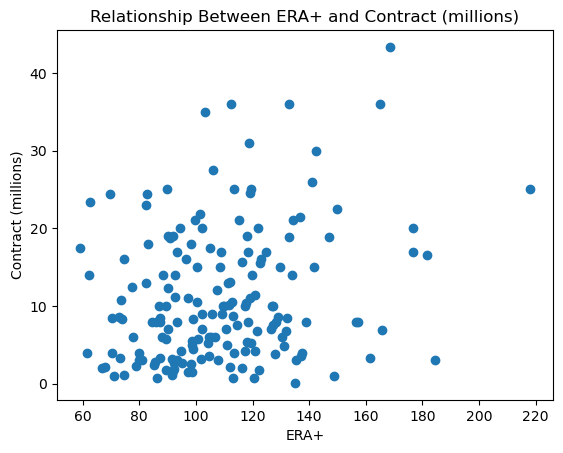

In [105]:
# plots the relationship between ERA+ and salary to see if it is linear (enough)
plt.scatter(x=bwar_age['ERA_plus'], y=bwar_age['salary']/1000000)
plt.title('Relationship Between ERA+ and Contract (millions)')
plt.xlabel('ERA+')
plt.ylabel('Contract (millions)')

In [71]:
print(f"Jesús Luzardo estimated value: {round(bwar_age['mil_per_ERA+'].median() * 125, 2)}")

Jesús Luzardo estimated value: 10.73


In [74]:
print(f"Estimated value - contract (surplus value): {round(bwar_age['mil_per_ERA+'].median() * 125 - 2.45, 2)}")

Estimated value - contract (surplus value): 8.28
